In [2]:
import pandas as pd
df_dict = pd.read_excel('C:/Users/Hp/Downloads/cdc-diabetes-2018 (2).xlsx', sheet_name=None)
obesity_data = df_dict['Obesity']
inactivity_data = df_dict['Inactivity']
diabetes_data = df_dict['Diabetes']
# Merge the DataFrames
merged_data = pd.merge(obesity_data, inactivity_data, on='COUNTY')
merged_data = pd.merge(merged_data, diabetes_data, on='COUNTY')

# Print the merged DataFrame
print(merged_data)


      YEAR_x  FIPS_x                     COUNTY   STATE_x  % OBESE  YEAR_y  \
0       2018    1011             Bullock County   Alabama     18.7    2018   
1       2018    2068             Denali Borough    Alaska     18.9    2018   
2       2018    2105  Hoonah-Angoon Census Area    Alaska     19.4    2018   
3       2018    2195     Petersburg Census Area    Alaska     17.2    2018   
4       2018    2230       Skagway Municipality    Alaska     18.3    2018   
...      ...     ...                        ...       ...      ...     ...   
4421    2018   51181               Surry County  Virginia     19.0    2018   
4422    2018   51181               Surry County  Virginia     19.0    2018   
4423    2018   51820            Waynesboro City  Virginia     19.5    2018   
4424    2018   51830          Williamsburg City  Virginia     18.0    2018   
4425    2018   51840            Winchester City  Virginia     19.4    2018   

      FIPDS   STATE_y  % INACTIVE  YEAR  FIPS_y          STATEW

The state with the highest percentage of diabetic problems is Alabama with 9.4%.
The state with the healthiest population is Wyoming with a health score of 69.30000000000001.


C:\Users\Hp\AppData\Local\Temp\ipykernel_5916\3027416395.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_data['Health Score'] = 100 - health_data['% OBESE'] - health_data['% INACTIVE'] - health_data['% DIABETIC']


Descriptive Statistics:
               % OBESE                                                        \
                 count       mean           std   min     25%    50%     75%   
STATE_x                                                                        
Alabama            1.0  18.700000           NaN  18.7  18.700  18.70  18.700   
Alaska             4.0  18.450000  9.469248e-01  17.2  18.025  18.60  19.025   
Arkansas         162.0  19.000000  0.000000e+00  19.0  19.000  19.00  19.000   
California        16.0  17.362500  1.050000e+00  15.4  16.950  17.40  18.100   
Colorado         415.0  18.306265  8.753794e-01  13.6  17.800  18.90  19.000   
Georgia          626.0  19.030671  4.354145e-01  16.6  18.800  19.30  19.300   
Hawaii             1.0  17.600000           NaN  17.6  17.600  17.60  17.600   
Idaho            101.0  18.637624  8.663546e-01  15.7  18.900  18.90  18.900   
Illinois        1103.0  18.515413  6.643761e-01  16.7  17.900  18.70  19.000   
Kansas          

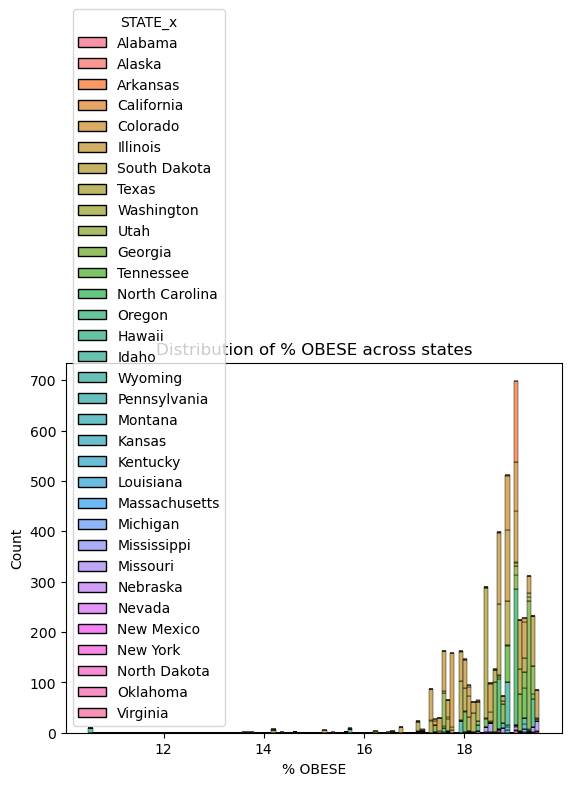

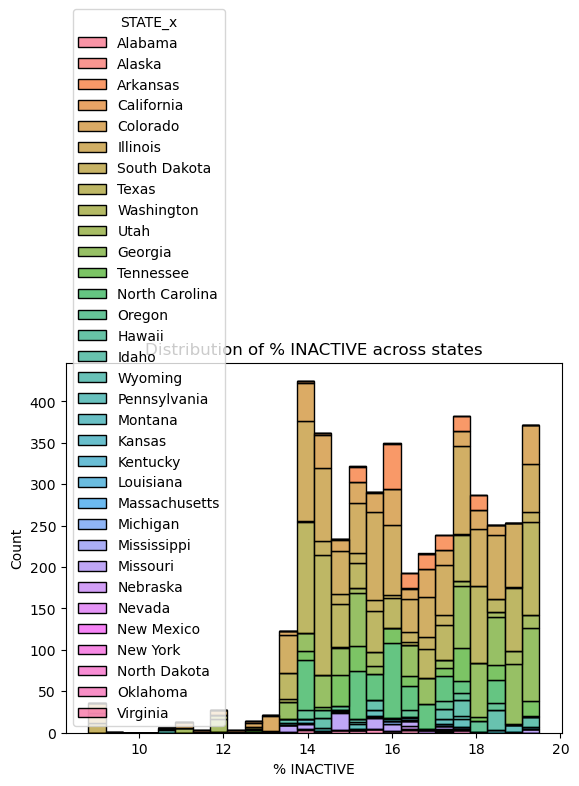

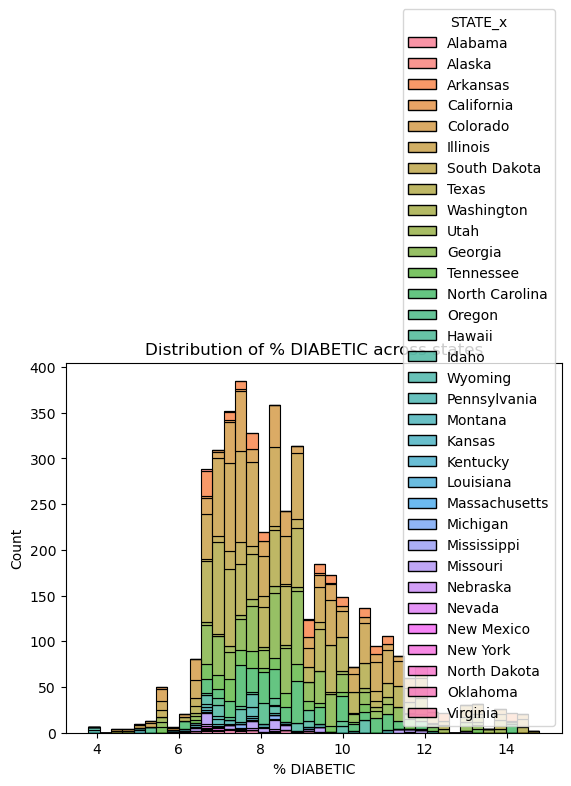


Visualization:


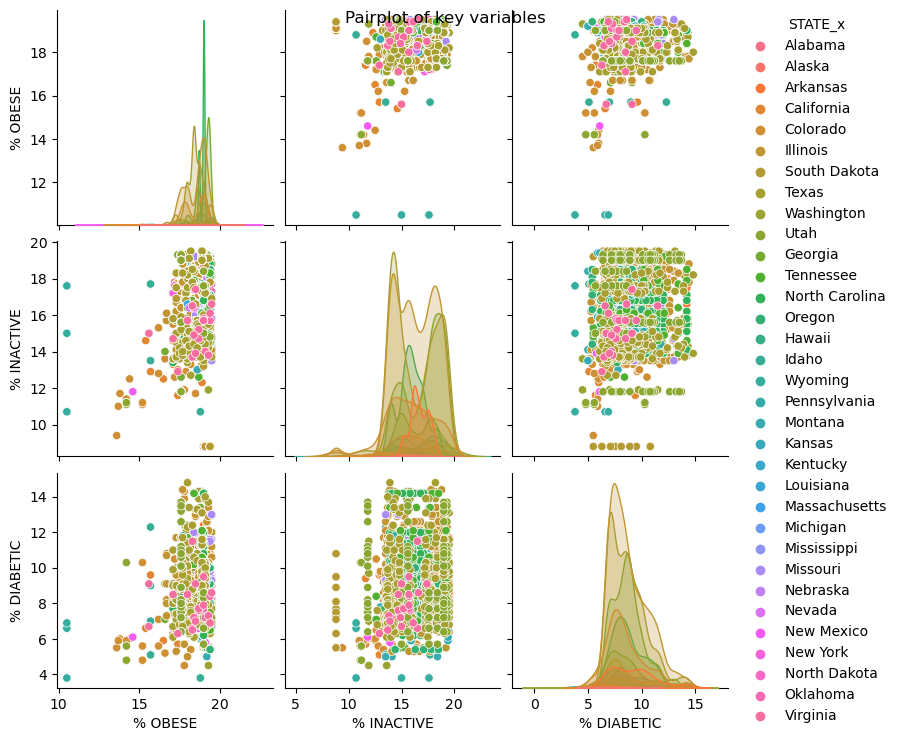


Correlation Analysis:


C:\Users\Hp\AppData\Local\Temp\ipykernel_5916\3027416395.py:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bias_data.corr()


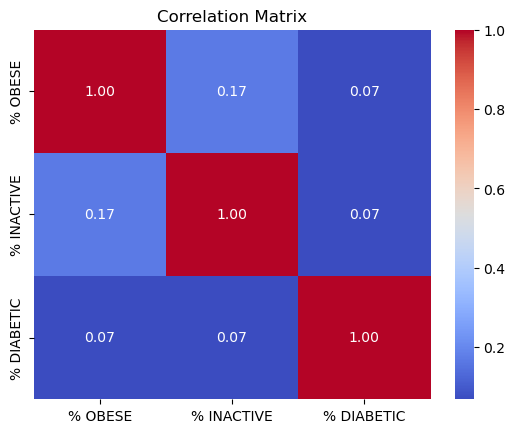


Representativeness:


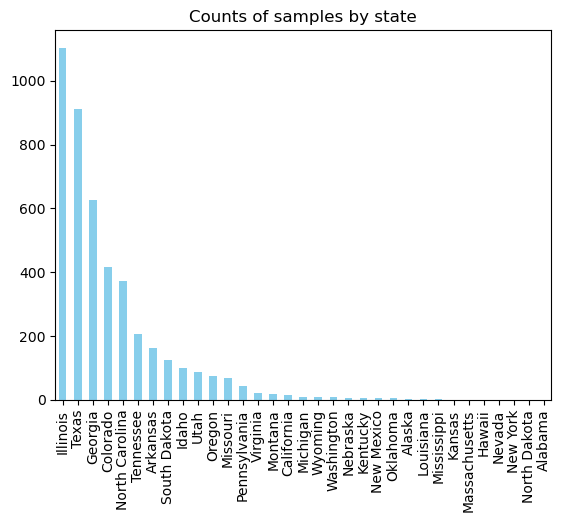

In [7]:
import pandas as pd

# Extract relevant columns for analysis
diabetes_data = merged_data[['STATE_x', '% DIABETIC']]

# Group by state and calculate the mean percentage of diabetic problems
state_diabetes_mean = diabetes_data.groupby('STATE_x')['% DIABETIC'].mean()

# Find the state with the highest mean percentage of diabetic problems
highest_diabetes_state = state_diabetes_mean.idxmax()
highest_diabetes_percentage = state_diabetes_mean.max()

print(f"The state with the highest percentage of diabetic problems is {highest_diabetes_state} with {highest_diabetes_percentage}%.")
import pandas as pd
health_data = merged_data[['STATE_x', '% OBESE', '% INACTIVE', '% DIABETIC']]

# Create a health score based on the inverse of obesity, inactivity, and diabetes percentages
health_data['Health Score'] = 100 - health_data['% OBESE'] - health_data['% INACTIVE'] - health_data['% DIABETIC']

# Group by state and calculate the mean health score
state_health_mean = health_data.groupby('STATE_x')['Health Score'].mean()

# Find the state with the highest mean health score
healthiest_state = state_health_mean.idxmax()
highest_health_score = state_health_mean.max()

print(f"The state with the healthiest population is {healthiest_state} with a health score of {highest_health_score}.")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant columns for analysis
bias_data = merged_data[['STATE_x', '% OBESE', '% INACTIVE', '% DIABETIC']]

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(bias_data.groupby('STATE_x').describe())
# 2. Distribution Comparison
print("\nDistribution Comparison:")
for column in ['% OBESE', '% INACTIVE', '% DIABETIC']:
    sns.histplot(data=bias_data, x=column, hue='STATE_x', multiple="stack")
    plt.title(f'Distribution of {column} across states')
    plt.show()
# 3. Visualization
print("\nVisualization:")
sns.pairplot(bias_data, hue='STATE_x', height=2.5)
plt.suptitle('Pairplot of key variables')
plt.show()
# 4. Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = bias_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# 5. Representativeness
print("\nRepresentativeness:")
state_counts = bias_data['STATE_x'].value_counts()
state_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of samples by state')
plt.show()




Distribution Comparison:


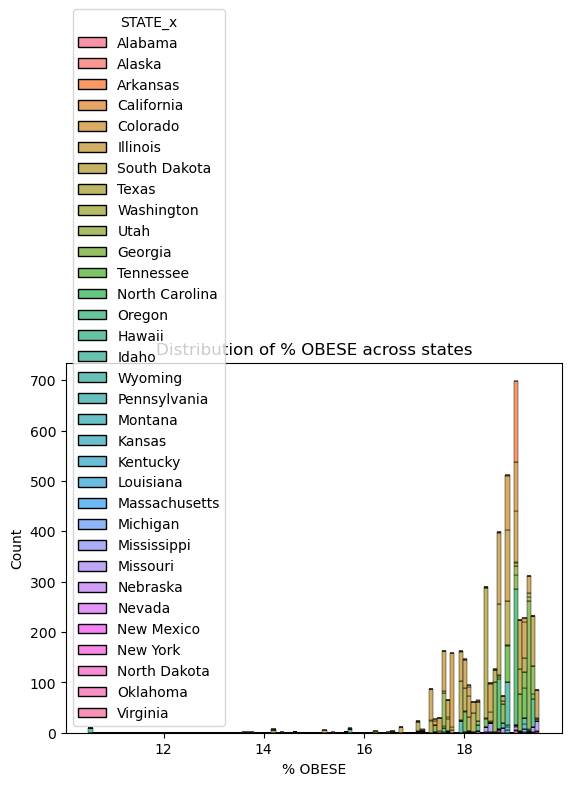

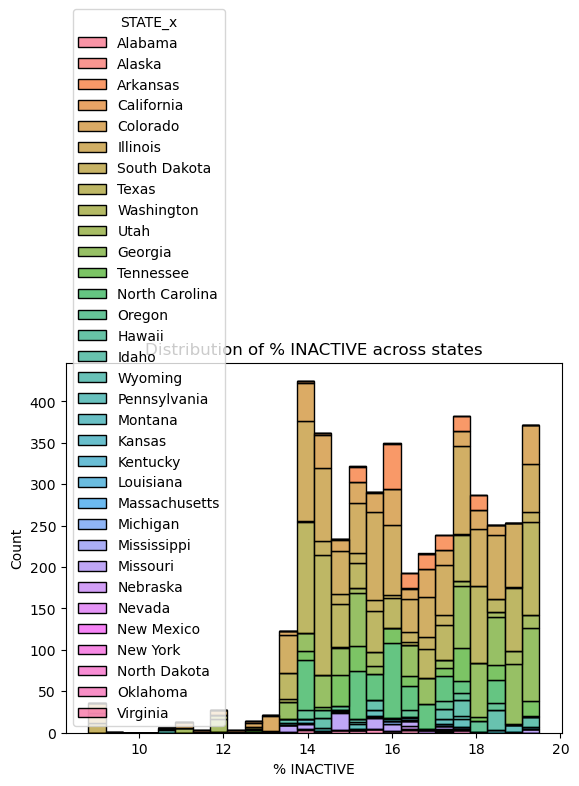

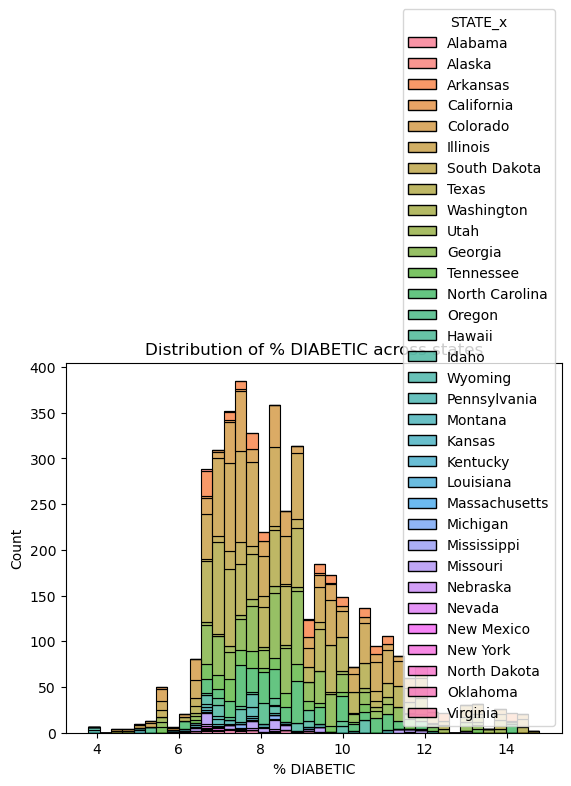


Visualization:


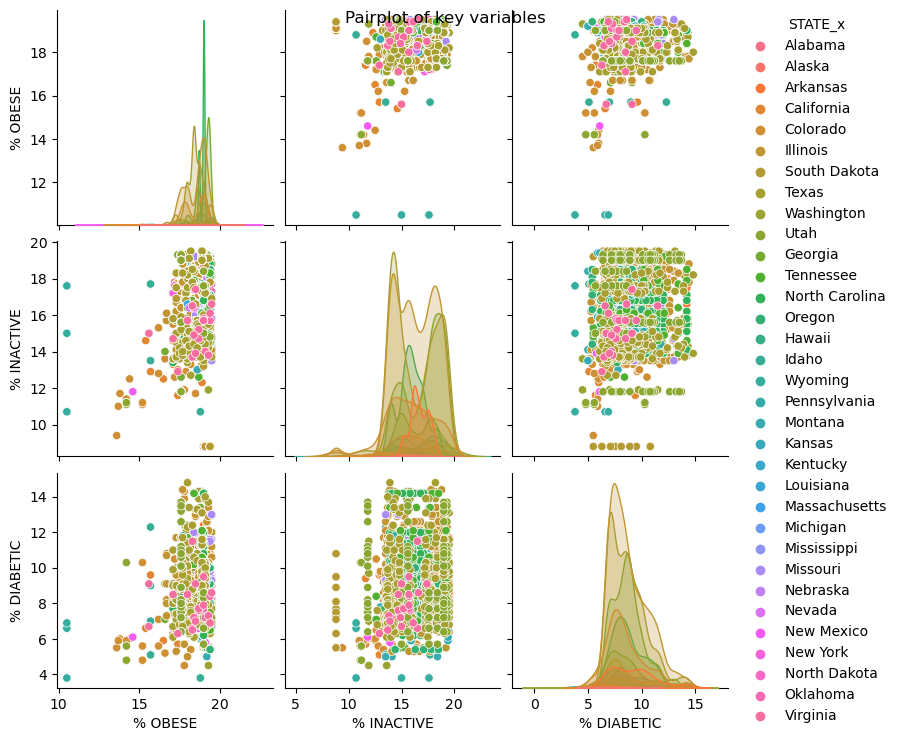


Correlation Analysis:


C:\Users\Hp\AppData\Local\Temp\ipykernel_5916\3682712158.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bias_data.corr()


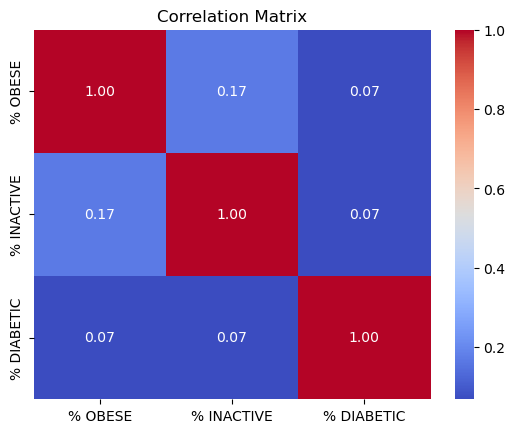


Representativeness:


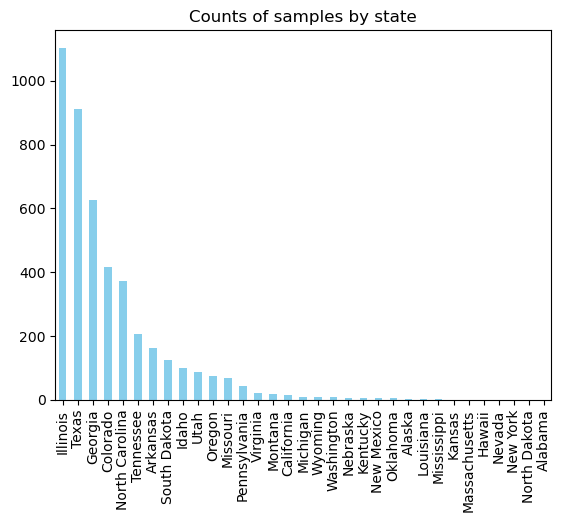

In [8]:
# 2. Distribution Comparison
print("\nDistribution Comparison:")
for column in ['% OBESE', '% INACTIVE', '% DIABETIC']:
    sns.histplot(data=bias_data, x=column, hue='STATE_x', multiple="stack")
    plt.title(f'Distribution of {column} across states')
    plt.show()

# 3. Visualization
print("\nVisualization:")
sns.pairplot(bias_data, hue='STATE_x', height=2.5)
plt.suptitle('Pairplot of key variables')
plt.show()

# 4. Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = bias_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 5. Representativeness
print("\nRepresentativeness:")
state_counts = bias_data['STATE_x'].value_counts()
state_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of samples by state')
plt.show()

In [9]:
import pandas as pd

# Assuming your merged dataset is named 'merged_data'
# Replace 'your_column_names' with the actual column names in your dataset

# Find the state with the highest obesity rate
highest_obesity_state = merged_data.groupby('STATE_x')['% OBESE'].mean().idxmax()

# Find the state with the lowest obesity rate
lowest_obesity_state = merged_data.groupby('STATE_x')['% OBESE'].mean().idxmin()

# Find the state with the highest inactivity rate
highest_inactivity_state = merged_data.groupby('STATE_x')['% INACTIVE'].mean().idxmax()

# Find the state with the lowest inactivity rate
lowest_inactivity_state = merged_data.groupby('STATE_x')['% INACTIVE'].mean().idxmin()

# Find the state with the highest diabetes rate
highest_diabetes_state = merged_data.groupby('STATE_x')['% DIABETIC'].mean().idxmax()

# Find the state with the lowest diabetes rate
lowest_diabetes_state = merged_data.groupby('STATE_x')['% DIABETIC'].mean().idxmin()

print("State with the highest obesity rate:", highest_obesity_state)
print("State with the lowest obesity rate:", lowest_obesity_state)
print("State with the highest inactivity rate:", highest_inactivity_state)
print("State with the lowest inactivity rate:", lowest_inactivity_state)
print("State with the highest diabetes rate:", highest_diabetes_state)
print("State with the lowest diabetes rate:", lowest_diabetes_state)


State with the highest obesity rate: Washington
State with the lowest obesity rate: Wyoming
State with the highest inactivity rate: New York
State with the lowest inactivity rate: Washington
State with the highest diabetes rate: Alabama
State with the lowest diabetes rate: Wyoming


In [10]:
# Check for missing data in each column for each state
missing_data = merged_data.groupby('STATE_x').apply(lambda x: x.isnull().sum())

# Display the results
print(missing_data)


                YEAR_x  FIPS_x  COUNTY  STATE_x  % OBESE  YEAR_y  FIPDS  \
STATE_x                                                                   
Alabama              0       0       0        0        0       0      0   
Alaska               0       0       0        0        0       0      0   
Arkansas             0       0       0        0        0       0      0   
California           0       0       0        0        0       0      0   
Colorado             0       0       0        0        0       0      0   
Georgia              0       0       0        0        0       0      0   
Hawaii               0       0       0        0        0       0      0   
Idaho                0       0       0        0        0       0      0   
Illinois             0       0       0        0        0       0      0   
Kansas               0       0       0        0        0       0      0   
Kentucky             0       0       0        0        0       0      0   
Louisiana            0   

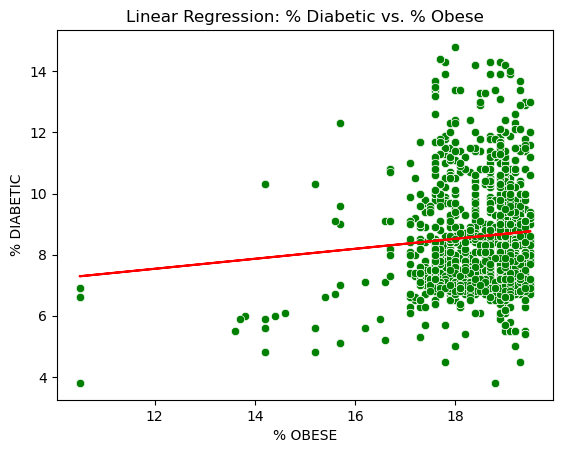

Slope: 0.16365697908981014
Intercept: 5.572709977462346


In [2]:
# Scatter plot
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

sns.scatterplot(x='% OBESE', y='% DIABETIC', data=merged_data,color='green')
plt.title('Linear Regression: % Diabetic vs. % Obese')

# Linear regression
X = merged_data['% OBESE'].values.reshape(-1, 1)
y = merged_data['% DIABETIC'].values
regressor = LinearRegression()
regressor.fit(X, y)

# Plotting the regression line
plt.plot(X, regressor.predict(X), color='red')
plt.show()

# Coefficients
print('Slope:', regressor.coef_[0])
print('Intercept:', regressor.intercept_)


Slope: 0.16365697908981014
Intercept: 5.572709977462346
Mean 10-fold CV Score: -0.035069054426000834


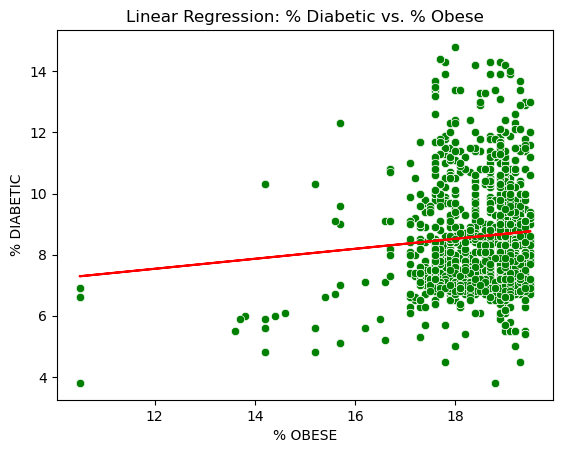

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Scatter plot with green bubbles
sns.scatterplot(x='% OBESE', y='% DIABETIC', data=merged_data, color='green')

# Linear regression
X = merged_data['% OBESE'].values.reshape(-1, 1)
y = merged_data['% DIABETIC'].values
regressor = LinearRegression()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=10)
mean_cv_score = np.mean(cv_scores)

# Plotting the regression line
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), color='red')
plt.title('Linear Regression: % Diabetic vs. % Obese')

# Coefficients
slope = regressor.coef_[0]
intercept = regressor.intercept_

print('Slope:', slope)
print('Intercept:', intercept)
print('Mean 10-fold CV Score:', mean_cv_score)

plt.show()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
X = merged_data['% OBESE'].values.reshape(-1, 1)
y = (merged_data['% DIABETIC'] > merged_data['% DIABETIC'].median()).astype(int)  # Binary label

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.4853273137697517
Confusion Matrix:
 [[204 241]
 [215 226]]


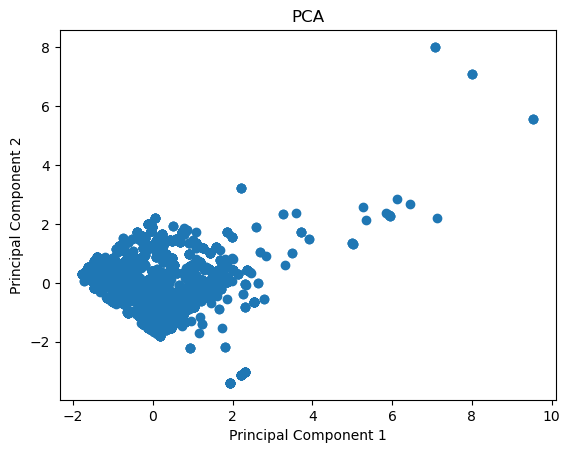

In [5]:
# PCA
X = merged_data[['% OBESE', '% INACTIVE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


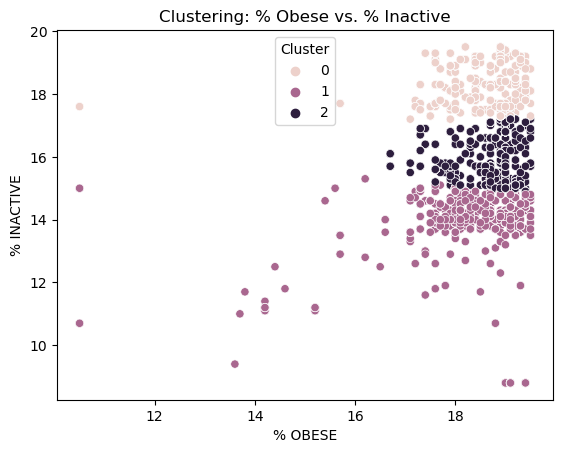

In [6]:
# Clustering
X = merged_data[['% OBESE', '% INACTIVE']]
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
merged_data['Cluster'] = kmeans.fit_predict(X)

# Visualize
sns.scatterplot(x='% OBESE', y='% INACTIVE', hue='Cluster', data=merged_data)
plt.title('Clustering: % Obese vs. % Inactive')
plt.show()


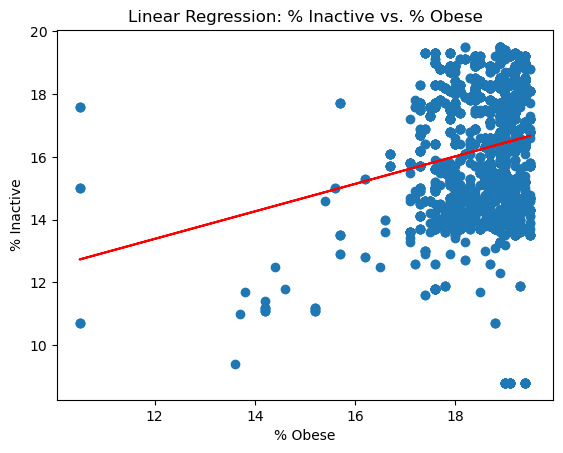

Slope: 0.437856352509904
Intercept: 8.133030397629028


In [7]:
# Linear Regression for % Obese and % Inactive
X_obese_inactive = merged_data[['% OBESE']].values
y_obese_inactive = merged_data['% INACTIVE'].values

# Perform linear regression
regressor_obese_inactive = LinearRegression()
regressor_obese_inactive.fit(X_obese_inactive, y_obese_inactive)

# Visualize the linear regression line
plt.scatter(X_obese_inactive, y_obese_inactive)
plt.plot(X_obese_inactive, regressor_obese_inactive.predict(X_obese_inactive), color='red')
plt.xlabel('% Obese')
plt.ylabel('% Inactive')
plt.title('Linear Regression: % Inactive vs. % Obese')
plt.show()

# Print the coefficients
print('Slope:', regressor_obese_inactive.coef_[0])
print('Intercept:', regressor_obese_inactive.intercept_)


In [8]:
# Logistic Regression for % Obese and % Inactive
# Assuming you have merged_data, X_train, X_test, y_train, y_test available

# Logistic regression
log_reg_obese_inactive = LogisticRegression()
log_reg_obese_inactive.fit(X_train, y_train)

# Predictions
y_pred_obese_inactive = log_reg_obese_inactive.predict(X_test)

# Model evaluation
accuracy_logistic_obese_inactive = accuracy_score(y_test, y_pred_obese_inactive)
print('Accuracy (Logistic Regression for % Obese and % Inactive):', accuracy_logistic_obese_inactive)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_obese_inactive))


Accuracy (Logistic Regression for % Obese and % Inactive): 0.4853273137697517
Confusion Matrix:
 [[204 241]
 [215 226]]


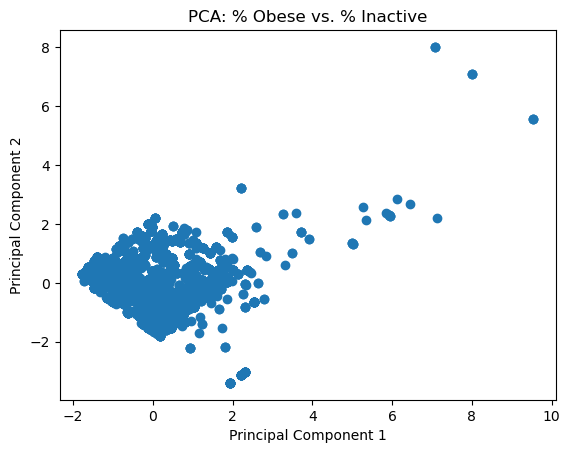

In [9]:
# PCA for % Obese and % Inactive
X_obese_inactive_pca = merged_data[['% OBESE', '% INACTIVE']]
scaler_obese_inactive = StandardScaler()
X_obese_inactive_scaled = scaler_obese_inactive.fit_transform(X_obese_inactive_pca)

pca_obese_inactive = PCA(n_components=2)
X_obese_inactive_pca_result = pca_obese_inactive.fit_transform(X_obese_inactive_scaled)

plt.scatter(X_obese_inactive_pca_result[:, 0], X_obese_inactive_pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: % Obese vs. % Inactive')
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


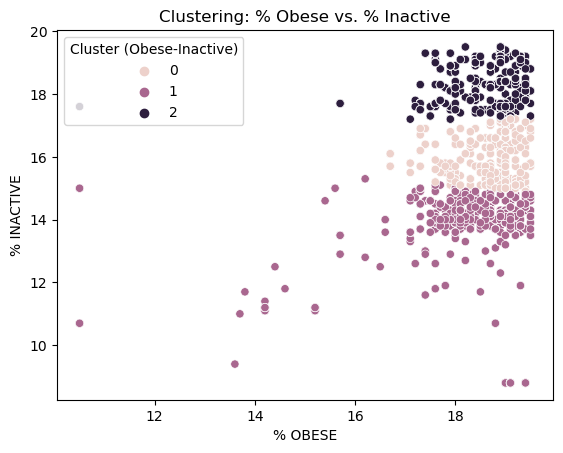

In [10]:
X = sm.add_constant(X) 
 
X_train, 	X_test, 	y_train, 	y_test 	= 	train_test_split(X, 	y, 	test_size=0.2, random_state=42) 
 
model = sm.OLS(y_train, X_train).fit() 
 
y_pred = model.predict(X_test) 
 
r_squared = r2_score(y_test, y_pred) print('R-squared:', r_squared) 
 
print(model.summary()) 
 
plt.figure(figsize=(10, 6)) 
plt.scatter(X_test['% INACTIVE'], y_test, color='blue', label='Actual % OBESE') plt.plot(X_test['% INACTIVE'], y_pred, color='red', linewidth=2, label='Regression Line') 
plt.xlabel('% INACTIVE') plt.ylabel('% OBESE') plt.legend() 
plt.title('Linear Regression: Actual vs. Predicted % OBESE with Regression Line') plt.show() 


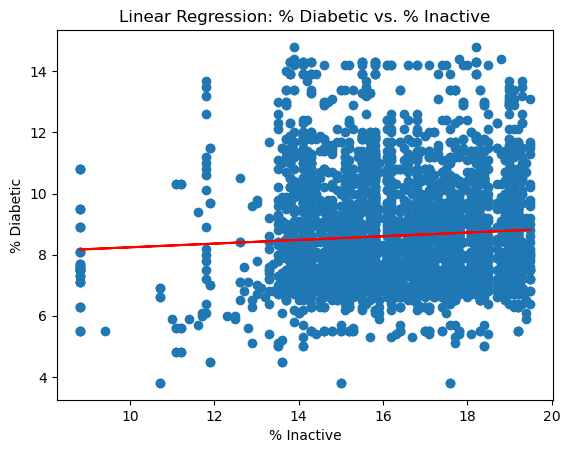

Slope: 0.06022344673595858
Intercept: 7.638311898299941


In [11]:
# Linear Regression for % Inactive and % Diabetic
X_inactive_diabetic = merged_data[['% INACTIVE']].values
y_inactive_diabetic = merged_data['% DIABETIC'].values

# Perform linear regression
regressor_inactive_diabetic = LinearRegression()
regressor_inactive_diabetic.fit(X_inactive_diabetic, y_inactive_diabetic)

# Visualize the linear regression line
plt.scatter(X_inactive_diabetic, y_inactive_diabetic)
plt.plot(X_inactive_diabetic, regressor_inactive_diabetic.predict(X_inactive_diabetic), color='red')
plt.xlabel('% Inactive')
plt.ylabel('% Diabetic')
plt.title('Linear Regression: % Diabetic vs. % Inactive')
plt.show()

# Print the coefficients
print('Slope:', regressor_inactive_diabetic.coef_[0])
print('Intercept:', regressor_inactive_diabetic.intercept_)


In [12]:
# Logistic Regression for % Inactive and % Diabetic
# Assuming you have merged_data, X_train, X_test, y_train, y_test available

# Logistic regression
log_reg_inactive_diabetic = LogisticRegression()
log_reg_inactive_diabetic.fit(X_train, y_train)

# Predictions
y_pred_inactive_diabetic = log_reg_inactive_diabetic.predict(X_test)

# Model evaluation
accuracy_logistic_inactive_diabetic = accuracy_score(y_test, y_pred_inactive_diabetic)
print('Accuracy (Logistic Regression for % Inactive and % Diabetic):', accuracy_logistic_inactive_diabetic)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_inactive_diabetic))


Accuracy (Logistic Regression for % Inactive and % Diabetic): 0.4853273137697517
Confusion Matrix:
 [[204 241]
 [215 226]]


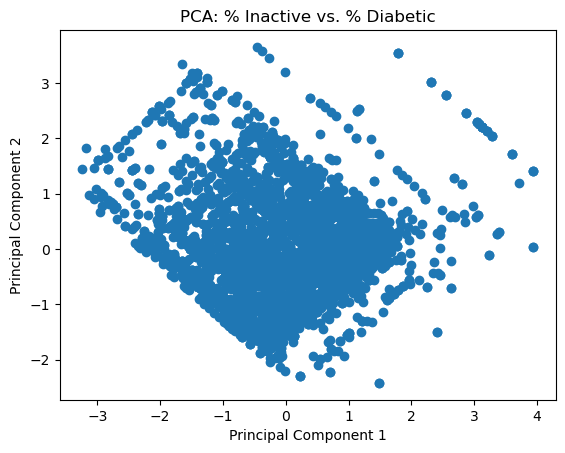

In [13]:
# PCA for % Inactive and % Diabetic
X_inactive_diabetic_pca = merged_data[['% INACTIVE', '% DIABETIC']]
scaler_inactive_diabetic = StandardScaler()
X_inactive_diabetic_scaled = scaler_inactive_diabetic.fit_transform(X_inactive_diabetic_pca)

pca_inactive_diabetic = PCA(n_components=2)
X_inactive_diabetic_pca_result = pca_inactive_diabetic.fit_transform(X_inactive_diabetic_scaled)

plt.scatter(X_inactive_diabetic_pca_result[:, 0], X_inactive_diabetic_pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: % Inactive vs. % Diabetic')
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


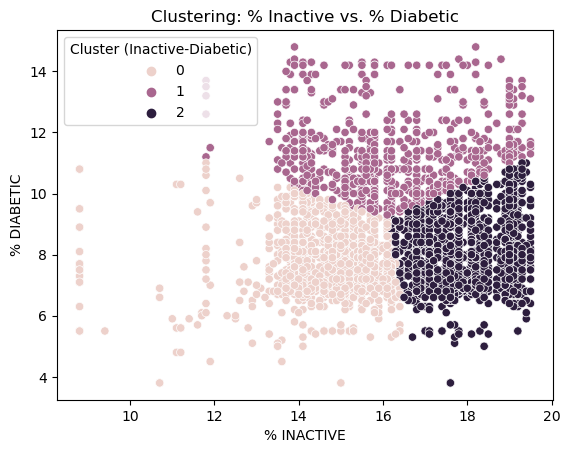

In [14]:
# Clustering for % Inactive and % Diabetic
n_clusters_inactive_diabetic = 3

kmeans_inactive_diabetic = KMeans(n_clusters=n_clusters_inactive_diabetic)
merged_data['Cluster (Inactive-Diabetic)'] = kmeans_inactive_diabetic.fit_predict(X_inactive_diabetic_pca)

sns.scatterplot(x='% INACTIVE', y='% DIABETIC', hue='Cluster (Inactive-Diabetic)', data=merged_data)
plt.title('Clustering: % Inactive vs. % Diabetic')
plt.show()


Slope: 0.16365697908981014
Intercept: 5.572709977462346
Mean 10-fold CV Score: -0.035069054426000834


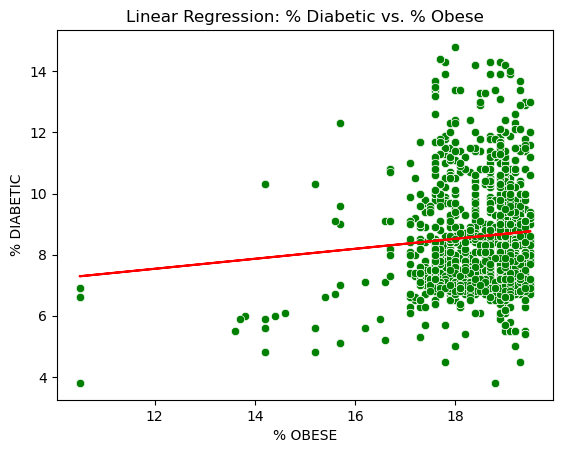

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Scatter plot with green bubbles
sns.scatterplot(x='% OBESE', y='% DIABETIC', data=merged_data, color='green')

# Linear regression
X = merged_data['% OBESE'].values.reshape(-1, 1)
y = merged_data['% DIABETIC'].values
regressor = LinearRegression()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=10)
mean_cv_score = np.mean(cv_scores)

# Plotting the regression line
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), color='red')
plt.title('Linear Regression: % Diabetic vs. % Obese')

# Coefficients
slope = regressor.coef_[0]
intercept = regressor.intercept_

print('Slope:', slope)
print('Intercept:', intercept)
print('Mean 10-fold CV Score:', mean_cv_score)

plt.show()


Slope: 0.16365697908981014
Intercept: 5.572709977462346
Mean 10-fold CV Score: -0.035069054426000834
T-statistic: nan
P-value: nan


C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


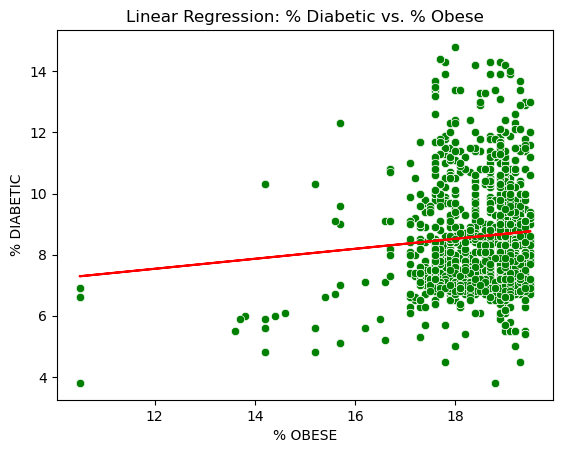

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy import stats  # Import stats module from scipy
import numpy as np

# Scatter plot with green bubbles
sns.scatterplot(x='% OBESE', y='% DIABETIC', data=merged_data, color='green')

# Linear regression
X = merged_data['% OBESE'].values.reshape(-1, 1)
y = merged_data['% DIABETIC'].values
regressor = LinearRegression()
regressor.fit(X, y)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=10)
mean_cv_score = np.mean(cv_scores)

# Plotting the regression line
plt.plot(X, regressor.predict(X), color='red')
plt.title('Linear Regression: % Diabetic vs. % Obese')

# Coefficients
slope = regressor.coef_[0]
intercept = regressor.intercept_

print('Slope:', slope)
print('Intercept:', intercept)
print('Mean 10-fold CV Score:', mean_cv_score)

# Perform t-test on the slope (correlation coefficient)
t_statistic, p_value = stats.ttest_1samp(regressor.coef_, 0)

print('T-statistic:', t_statistic)
print('P-value:', p_value)

plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the dataset from Excel
df_dict = pd.read_excel('C:/Users/Hp/Downloads/cdc-diabetes-2018 (2).xlsx', sheet_name=None)
obesity_data = df_dict['Obesity']
inactivity_data = df_dict['Inactivity']
diabetes_data = df_dict['Diabetes']

# Merge the DataFrames
merged_data = pd.merge(obesity_data, inactivity_data, on='COUNTY')
merged_data = pd.merge(merged_data, diabetes_data, on='COUNTY')

# Select relevant columns for linear regression
X = merged_data[['% INACTIVE', '% DIABETIC']]
y = merged_data['% OBESE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)


R-squared: 0.047277806298699265


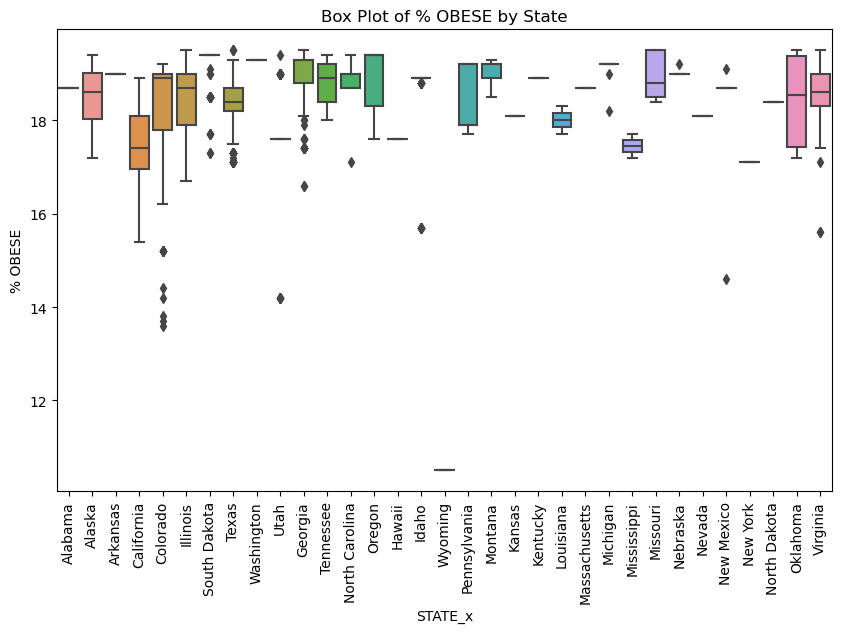

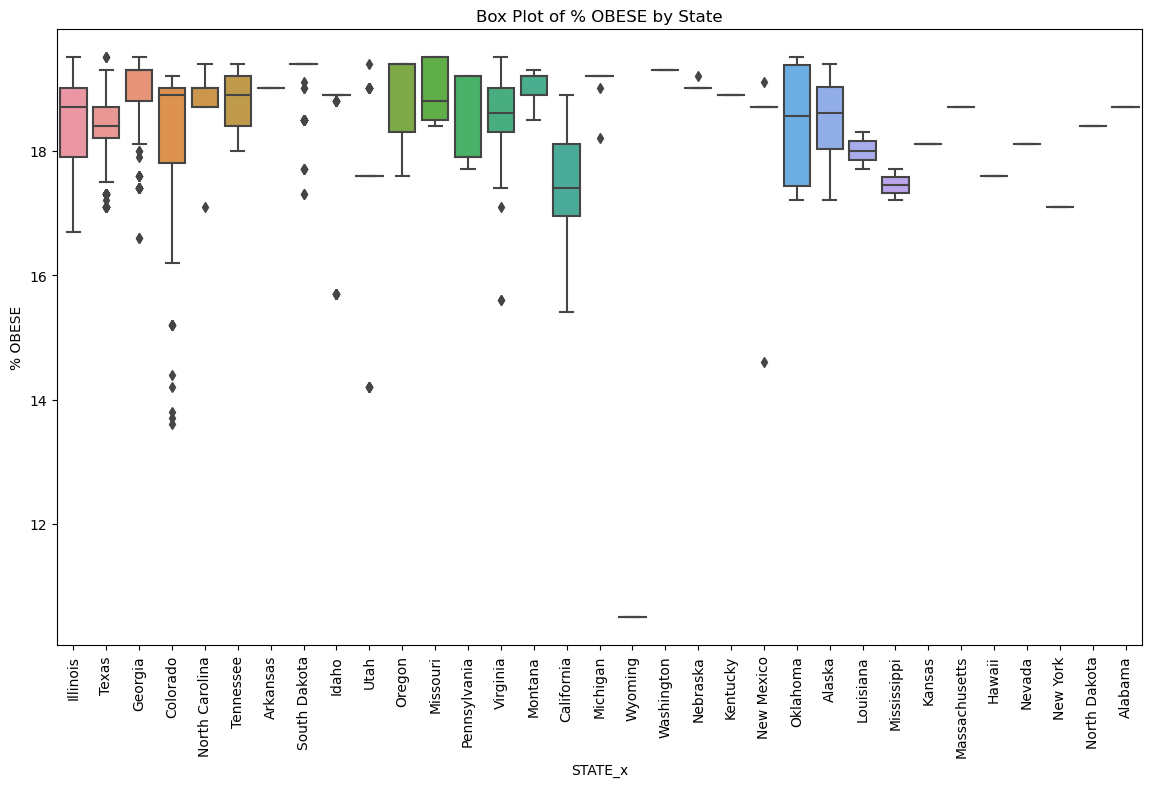

In [7]:
# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATE_x', y='% OBESE', data=merged_data)
plt.xticks(rotation=90)
plt.title('Box Plot of % OBESE by State')
plt.show()


# Create box plots for % OBESE by state
plt.figure(figsize=(14, 8))
sns.boxplot(x='STATE_x', y='% OBESE', data=merged_data, order=merged_data['STATE_x'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Box Plot of % OBESE by State')
plt.show()


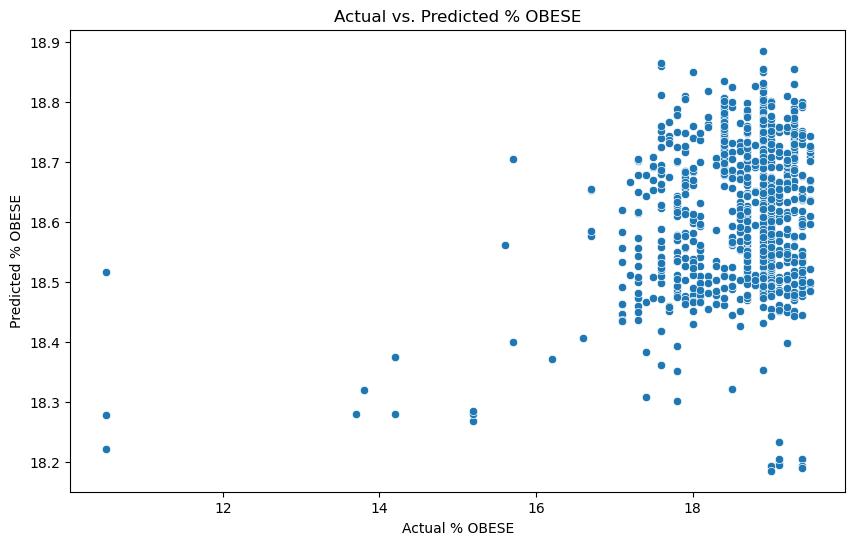

In [4]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual % OBESE')
plt.ylabel('Predicted % OBESE')
plt.title('Actual vs. Predicted % OBESE')
plt.show()


R-squared: 0.047277806298699265


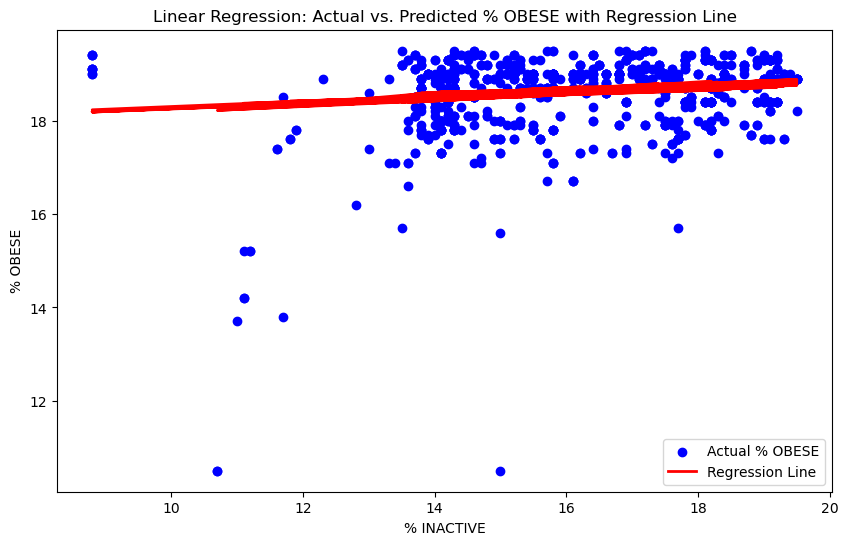

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the dataset from Excel
df_dict = pd.read_excel('C:/Users/Hp/Downloads/cdc-diabetes-2018 (2).xlsx', sheet_name=None)
obesity_data = df_dict['Obesity']
inactivity_data = df_dict['Inactivity']
diabetes_data = df_dict['Diabetes']

# Merge the DataFrames
merged_data = pd.merge(obesity_data, inactivity_data, on='COUNTY')
merged_data = pd.merge(merged_data, diabetes_data, on='COUNTY')

# Select relevant columns for linear regression
X = merged_data[['% INACTIVE', '% DIABETIC']]
y = merged_data['% OBESE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

# Visualize the actual data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['% INACTIVE'], y_test, color='blue', label='Actual % OBESE')
plt.plot(X_test['% INACTIVE'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('% INACTIVE')
plt.ylabel('% OBESE')
plt.legend()
plt.title('Linear Regression: Actual vs. Predicted % OBESE with Regression Line')
plt.show()


In [22]:
import pandas as pd

# Load the data into a DataFrame
# Assuming merged_data is the DataFrame containing the provided data

# Filter the relevant columns for diabetes
diabetes_data = merged_data[['COUNTY', 'STATEW', '% DIABETIC']]

# Find the county with the highest diabetic percentage
max_diabetic_percentage = diabetes_data['% DIABETIC'].max()
county_with_max_diabetic = diabetes_data.loc[diabetes_data['% DIABETIC'] == max_diabetic_percentage]

# Find the county with the lowest diabetic percentage
min_diabetic_percentage = diabetes_data['% DIABETIC'].min()
county_with_min_diabetic = diabetes_data.loc[diabetes_data['% DIABETIC'] == min_diabetic_percentage]

# Print the county with the highest and lowest diabetic percentage
print("County with the Highest Diabetic Percentage:")
print(county_with_max_diabetic)
print("\nCounty with the Lowest Diabetic Percentage:")
print(county_with_min_diabetic)


# Filter the relevant columns for obesity
obesity_data = merged_data[['COUNTY', 'STATEW', '% OBESE']]

# Find the county with the highest obesity percentage
max_obesity_percentage = obesity_data['% OBESE'].max()
county_with_max_obesity = obesity_data.loc[obesity_data['% OBESE'] == max_obesity_percentage]

# Find the county with the lowest obesity percentage
min_obesity_percentage = obesity_data['% OBESE'].min()
county_with_min_obesity = obesity_data.loc[obesity_data['% OBESE'] == min_obesity_percentage]

# Print the county with the highest and lowest obesity percentage
print("\nCounty with the Highest Obesity Percentage:")
print(county_with_max_obesity)
print("\nCounty with the Lowest Obesity Percentage:")
print(county_with_min_obesity)


# Filter the relevant columns for inactivity
inactivity_data = merged_data[['COUNTY', 'STATEW', '% INACTIVE']]

# Find the county with the highest inactivity percentage
max_inactivity_percentage = inactivity_data['% INACTIVE'].max()
county_with_max_inactivity = inactivity_data.loc[inactivity_data['% INACTIVE'] == max_inactivity_percentage]

# Find the county with the lowest inactivity percentage
min_inactivity_percentage = inactivity_data['% INACTIVE'].min()
county_with_min_inactivity = inactivity_data.loc[inactivity_data['% INACTIVE'] == min_inactivity_percentage]

# Print the county with the highest and lowest inactivity percentage
print("\nCounty with the Highest Inactivity Percentage:")
print(county_with_max_inactivity)
print("\nCounty with the Lowest Inactivity Percentage:")
print(county_with_min_inactivity)


County with the Highest Diabetic Percentage:
            COUNTY    STATEW  % DIABETIC
4046  Floyd County  Kentucky        14.8
4052  Floyd County  Kentucky        14.8

County with the Lowest Diabetic Percentage:
            COUNTY   STATEW  % DIABETIC
2438  Teton County  Wyoming         3.8
2441  Teton County  Wyoming         3.8
2444  Teton County  Wyoming         3.8
2447  Teton County  Wyoming         3.8
2450  Teton County  Wyoming         3.8
2453  Teton County  Wyoming         3.8

County with the Highest Obesity Percentage:
                  COUNTY    STATEW  % OBESE
1991      Terrell County   Georgia     19.5
1992      Terrell County     Texas     19.5
1993      Terrell County   Georgia     19.5
1994      Terrell County     Texas     19.5
2736     Hamilton County   Florida     19.5
...                  ...       ...      ...
3696         Love County  Oklahoma     19.5
4007        Erath County     Texas     19.5
4056    Freestone County     Texas     19.5
4287  Shackelford Coun

In [9]:
# Calculate basic descriptive statistics
descriptive_stats = merged_data.describe()
print(descriptive_stats)


       YEAR_x        FIPS_x      % OBESE  YEAR_y         FIPDS   % INACTIVE  \
count  4426.0   4426.000000  4426.000000  4426.0   4426.000000  4426.000000   
mean   2018.0  27476.293945    18.613466  2018.0  30855.682558    16.283055   
std       0.0  16128.792266     0.760113     0.0  15304.907843     1.984380   
min    2018.0   1011.000000    10.500000  2018.0   1011.000000     8.800000   
25%    2018.0  13301.000000    18.300000  2018.0  17087.000000    14.600000   
50%    2018.0  17155.000000    18.900000  2018.0  29139.000000    16.200000   
75%    2018.0  47083.000000    19.000000  2018.0  47067.000000    18.000000   
max    2018.0  56039.000000    19.500000  2018.0  56039.000000    19.500000   

         YEAR        FIPS_y   % DIABETIC  
count  4426.0   4426.000000  4426.000000  
mean   2018.0  29385.001582     8.618934  
std       0.0  14776.464462     1.745510  
min    2018.0   1011.000000     3.800000  
25%    2018.0  18019.000000     7.300000  
50%    2018.0  28149.000000   

In [10]:
# Calculate the correlation matrix
correlation_matrix = merged_data[['% OBESE', '% INACTIVE', '% DIABETIC']].corr()
print(correlation_matrix)


             % OBESE  % INACTIVE  % DIABETIC
% OBESE     1.000000    0.167720    0.071267
% INACTIVE  0.167720    1.000000    0.068465
% DIABETIC  0.071267    0.068465    1.000000


In [11]:
# Get top counties for each variable
top_counties_obesity = merged_data.nlargest(5, '% OBESE')
top_counties_inactivity = merged_data.nlargest(5, '% INACTIVE')
top_counties_diabetes = merged_data.nlargest(5, '% DIABETIC')

print("Top Counties for Obesity:\n", top_counties_obesity)
print("\nTop Counties for Inactivity:\n", top_counties_inactivity)
print("\nTop Counties for Diabetes:\n", top_counties_diabetes)


Top Counties for Obesity:
       YEAR_x  FIPS_x           COUNTY   STATE_x  % OBESE  YEAR_y  FIPDS  \
1991    2018   13273   Terrell County   Georgia     19.5    2018  13273   
1992    2018   13273   Terrell County   Georgia     19.5    2018  13273   
1993    2018   13273   Terrell County   Georgia     19.5    2018  48443   
1994    2018   13273   Terrell County   Georgia     19.5    2018  48443   
2736    2018   17065  Hamilton County  Illinois     19.5    2018  17065   

       STATE_y  % INACTIVE  YEAR  FIPS_y   STATEW  % DIABETIC  
1991   Georgia        18.8  2018   13273  Georgia         7.9  
1992   Georgia        18.8  2018   48443    Texas         6.9  
1993     Texas        13.9  2018   13273  Georgia         7.9  
1994     Texas        13.9  2018   48443    Texas         6.9  
2736  Illinois        15.7  2018   12047  Florida        12.0  

Top Counties for Inactivity:
      YEAR_x  FIPS_x       COUNTY   STATE_x  % OBESE  YEAR_y  FIPDS   STATE_y  \
951    2018    8065  Lake C

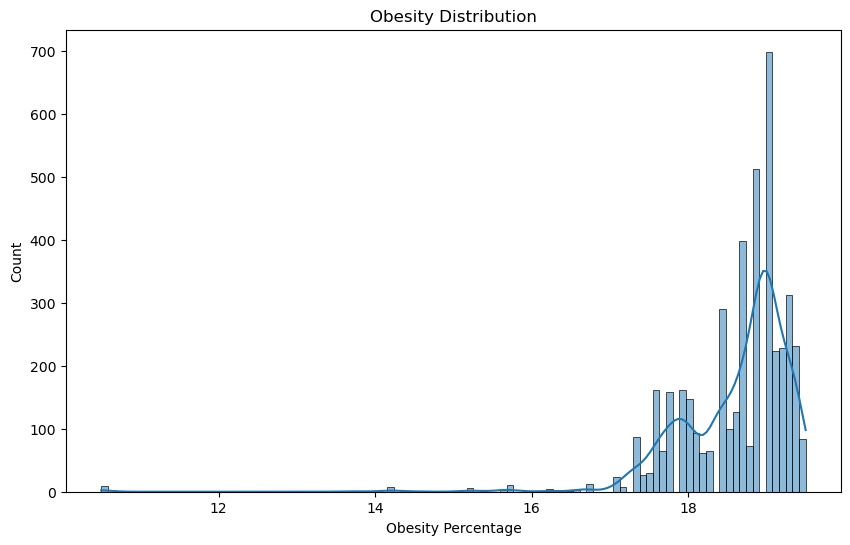

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for obesity
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['% OBESE'], kde=True)
plt.title('Obesity Distribution')
plt.xlabel('Obesity Percentage')
plt.ylabel('Count')
plt.show()


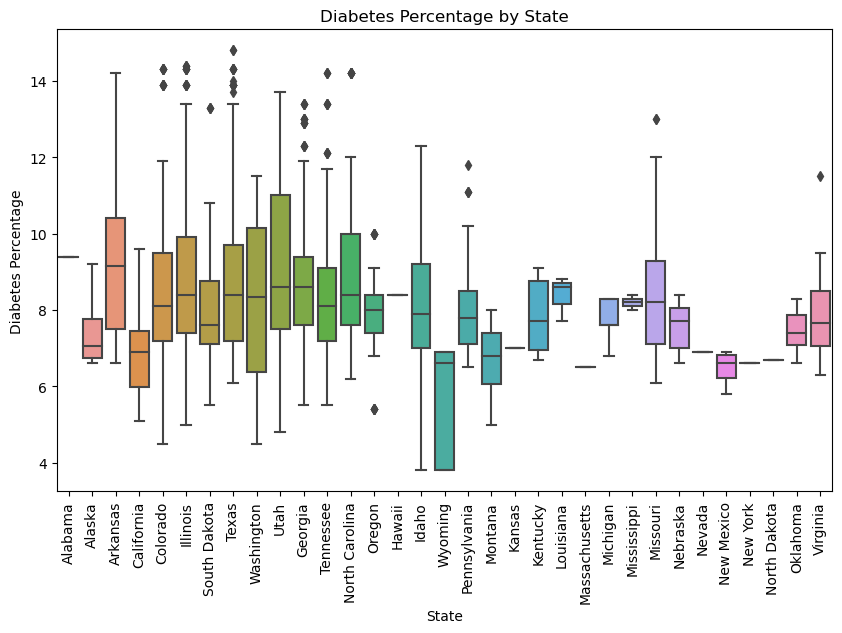

In [13]:
# Boxplot for diabetes percentage
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATE_x', y='% DIABETIC', data=merged_data)
plt.xticks(rotation=90)
plt.title('Diabetes Percentage by State')
plt.xlabel('State')
plt.ylabel('Diabetes Percentage')
plt.show()


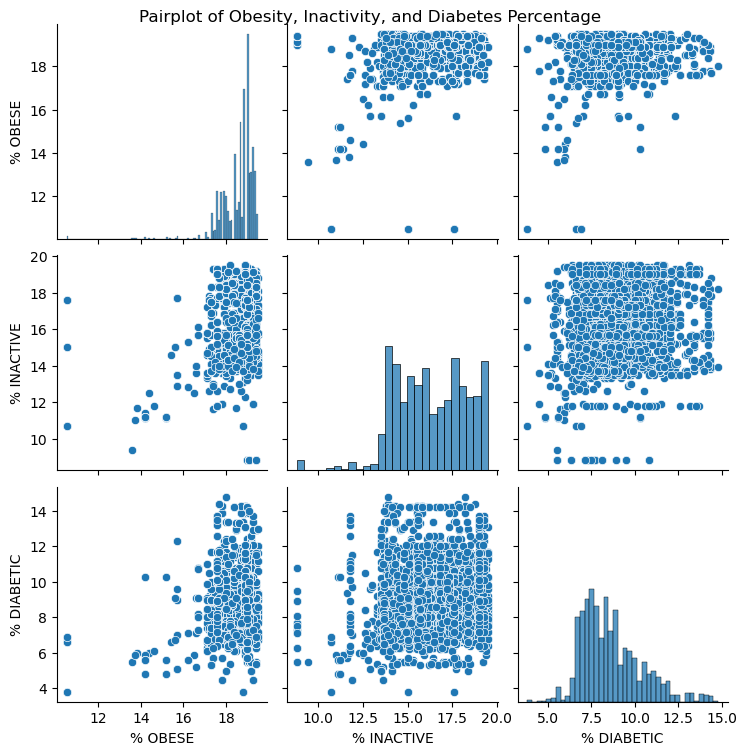

In [27]:
# Pairplot for selected variables
sns.pairplot(merged_data[['% OBESE', '% INACTIVE', '% DIABETIC']])
plt.suptitle('Pairplot of Obesity, Inactivity, and Diabetes Percentage', y=1)
plt.show()


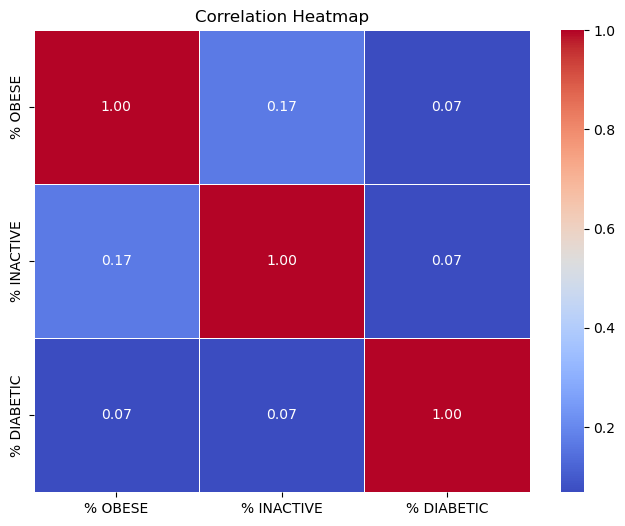

In [15]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


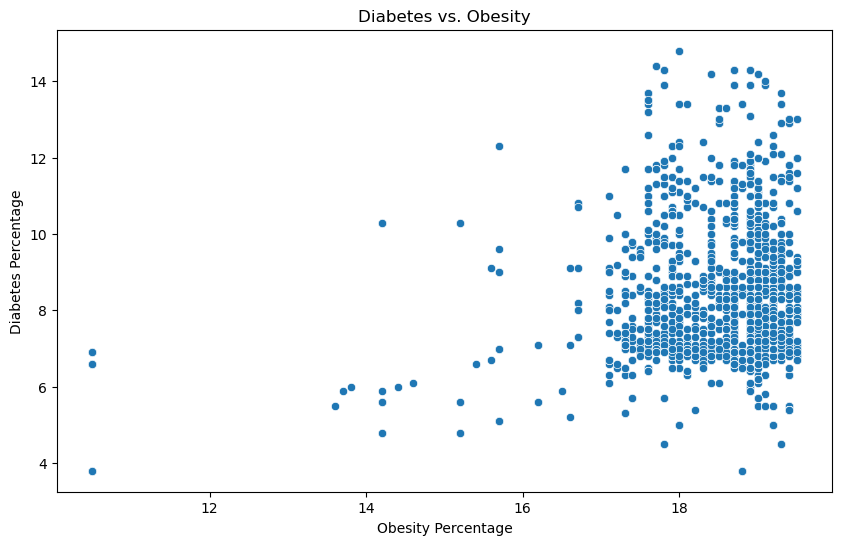

In [16]:
# Scatter plot for diabetes vs. obesity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% OBESE', y='% DIABETIC', data=merged_data)
plt.title('Diabetes vs. Obesity')
plt.xlabel('Obesity Percentage')
plt.ylabel('Diabetes Percentage')
plt.show()


In [17]:
import statsmodels.api as sm

# Perform linear regression (e.g., Diabetes vs. Obesity)
X = merged_data['% OBESE']  # Independent variable (Obesity)
y = merged_data['% DIABETIC']  # Dependent variable (Diabetes)

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the regression
print(model.summary())

# Extract R-squared and p-value
r_squared = model.rsquared
p_value = model.pvalues[1]

# Print R-squared and p-value
print('R-squared:', r_squared)
print('p-value:', p_value)


                            OLS Regression Results                            
Dep. Variable:             % DIABETIC   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     22.58
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.08e-06
Time:                        22:03:20   Log-Likelihood:                -8733.9
No. Observations:                4426   AIC:                         1.747e+04
Df Residuals:                    4424   BIC:                         1.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5727      0.642      8.687      0.0

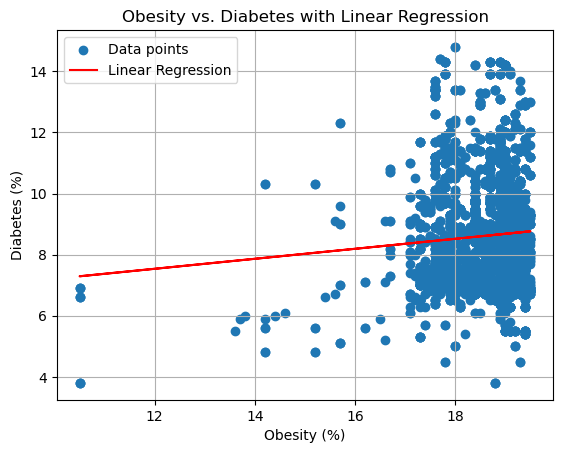

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.scatter(merged_data['% OBESE'], merged_data['% DIABETIC'], label='Data points')

# Linear regression line
plt.plot(merged_data['% OBESE'], model.predict(X), color='red', label='Linear Regression')

plt.xlabel('Obesity (%)')
plt.ylabel('Diabetes (%)')
plt.title('Obesity vs. Diabetes with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


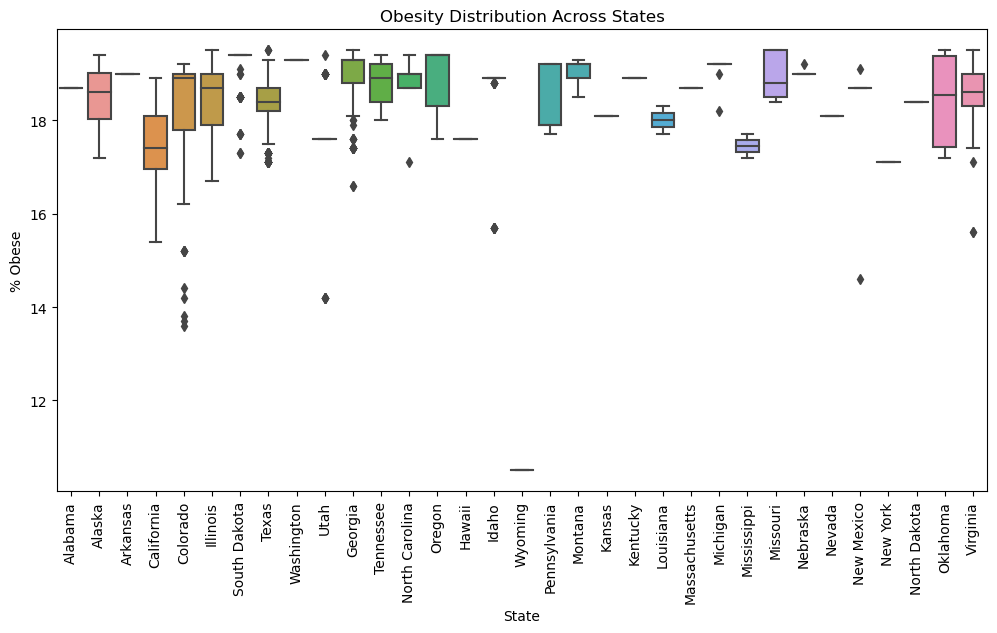

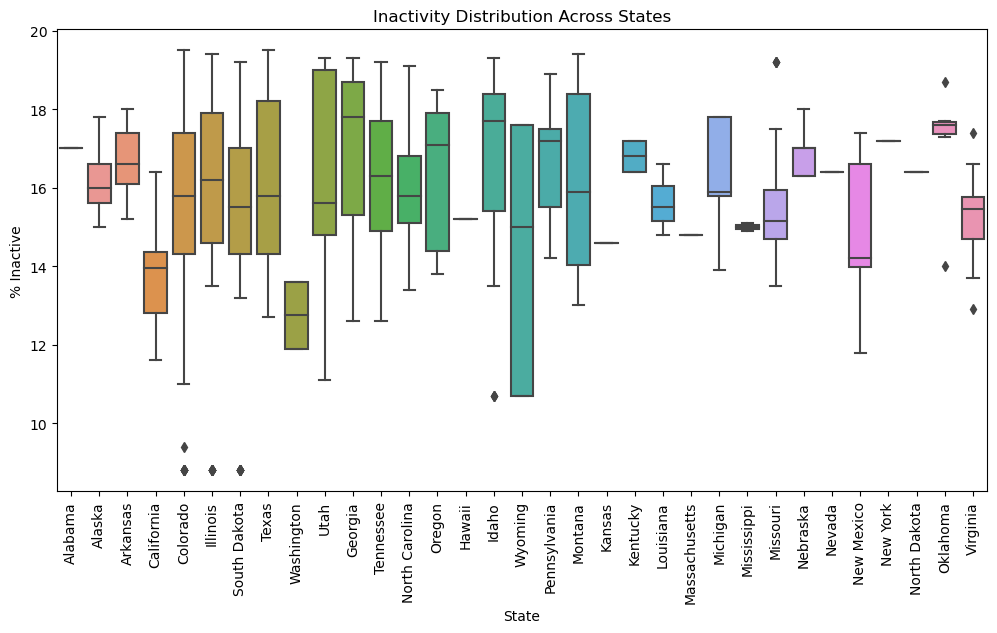

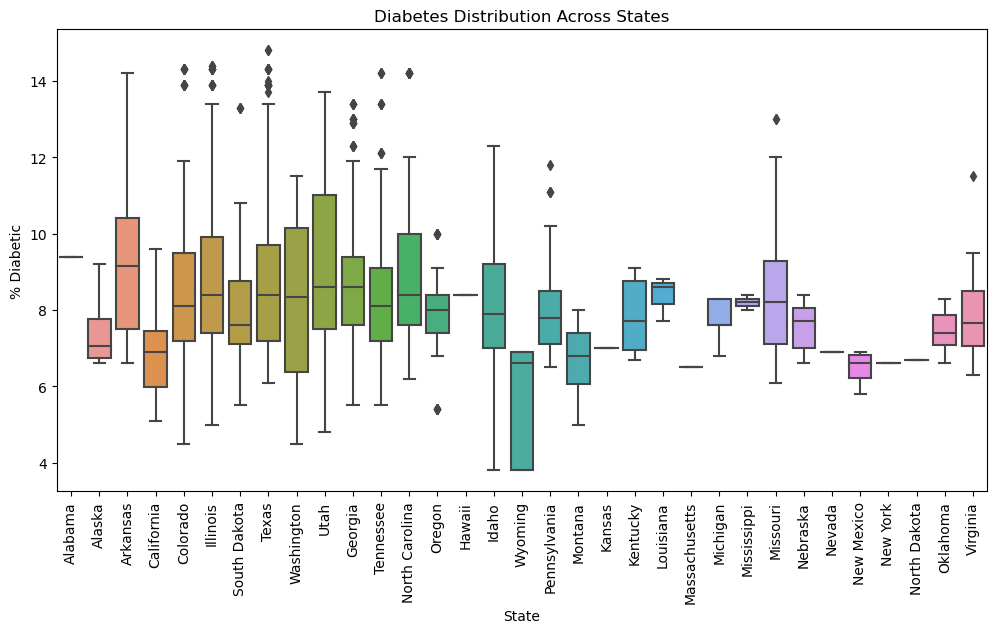

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_data' is your merged DataFrame with relevant data

# Box plot for obesity across states
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE_x', y='% OBESE', data=merged_data)
plt.title('Obesity Distribution Across States')
plt.xlabel('State')
plt.ylabel('% Obese')
plt.xticks(rotation=90)
plt.show()

# Box plot for inactivity across states
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE_x', y='% INACTIVE', data=merged_data)
plt.title('Inactivity Distribution Across States')
plt.xlabel('State')
plt.ylabel('% Inactive')
plt.xticks(rotation=90)
plt.show()

# Box plot for diabetes across states
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE_x', y='% DIABETIC', data=merged_data)
plt.title('Diabetes Distribution Across States')
plt.xlabel('State')
plt.ylabel('% Diabetic')
plt.xticks(rotation=90)
plt.show()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the dataset from Excel
df_dict = pd.read_excel('C:/Users/Hp/Downloads/cdc-diabetes-2018 (2).xlsx', sheet_name=None)
obesity_data = df_dict['Obesity']
inactivity_data = df_dict['Inactivity']
diabetes_data = df_dict['Diabetes']

# Merge the DataFrames
merged_data = pd.merge(obesity_data, inactivity_data, on='COUNTY')
merged_data = pd.merge(merged_data, diabetes_data, on='COUNTY')

# Select relevant columns for linear regression
X = merged_data[['% INACTIVE', '% DIABETIC']]
y = merged_data['% OBESE']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

# Print the summary of the regression model which includes p-values
print(model.summary())

# Visualize the actual data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['% INACTIVE'], y_test, color='blue', label='Actual % OBESE')
plt.plot(X_test['% INACTIVE'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('% INACTIVE')
plt.ylabel('% OBESE')
plt.legend()
plt.title('Linear Regression: Actual vs. Predicted % OBESE with Regression Line')
plt.show()



R-squared: 0.0472778062986996
                            OLS Regression Results                            
Dep. Variable:                % OBESE   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     44.20
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.09e-19
Time:                        03:02:28   Log-Likelihood:                -3869.5
No. Observations:                3540   AIC:                             7745.
Df Residuals:                    3537   BIC:                             7764.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5673 

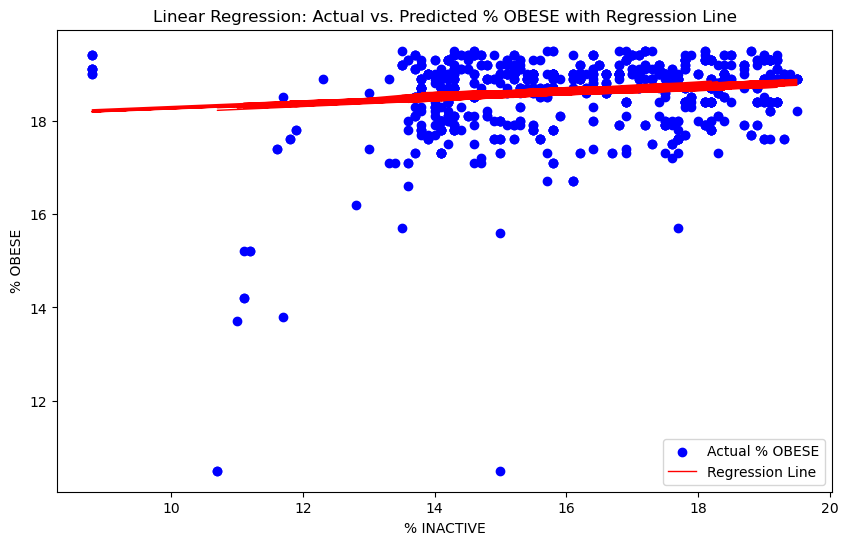

In [26]:
# Visualize the actual data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['% INACTIVE'], y_test, color='blue', label='Actual % OBESE')
plt.plot(X_test['% INACTIVE'], y_pred, color='red', linewidth=1, label='Regression Line')
plt.xlabel('% INACTIVE')
plt.ylabel('% OBESE')
plt.legend()
plt.title('Linear Regression: Actual vs. Predicted % OBESE with Regression Line')
plt.show()
